
# Sucide Rate Prediction 





In [ ]:
#Name-Pooja Prakashrao Gulhane
#Mis-111907034
#DA mini project

  Suicide is a serious public health problem. The World Health Organization (WHO) estimates that every year close to 800 000 people take their own life, which is one person every 40 seconds and there are many more people who attempt suicide. Suicide occurs throughout the lifespan and was the second leading cause of death among 15-29-year-olds globally in 2016.

           

 The objective of this notebook is to predict the suicide rates using Machine Learning algorithms and analyzing them to find correlated factors causing increase in suicide rates globally.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import sklearn.preprocessing 
from sklearn import preprocessing

### **Loading the dataset**

In [ ]:
data=pd.read_csv(r"/content/SucideData.csv")
print(data)

          country  year  ... gdp_per_capita       generation
0         Albania  1987  ...            796     Generation X
1         Albania  1987  ...            796           Silent
2         Albania  1987  ...            796     Generation X
3         Albania  1987  ...            796  G.I. Generation
4         Albania  1987  ...            796          Boomers
...           ...   ...  ...            ...              ...
27815  Uzbekistan  2014  ...           2309     Generation X
27816  Uzbekistan  2014  ...           2309           Silent
27817  Uzbekistan  2014  ...           2309     Generation Z
27818  Uzbekistan  2014  ...           2309     Generation Z
27819  Uzbekistan  2014  ...           2309          Boomers

[27820 rows x 12 columns]


The Dataset has taken from Kaggle.Here we can see that data consist of 27820 rows and 12 columns.

In [ ]:
data.shape

(27820, 12)

In [ ]:
data.size

333840

In [ ]:
data.ndim

2

In [ ]:
unique_country=data['country'].unique()
print(unique_country)

['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cabo Verde'
 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominica' 'Ecuador' 'El Salvador' 'Estonia'
 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Grenada'
 'Guatemala' 'Guyana' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Kazakhstan' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Macau' 'Maldives' 'Malta' 'Mauritius' 'Mexico'
 'Mongolia' 'Montenegro' 'Netherlands' 'New Zealand' 'Nicaragua' 'Norway'
 'Oman' 'Panama' 'Paraguay' 'Philippines' 'Poland' 'Portugal'
 'Puerto Rico' 'Qatar' 'Republic of Korea' 'Romania' 'Russian Federation'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Vincent and Grenadines'
 'San Marino' 'Serbia' 'Seychelles' 'Singapore' 'Slovakia' 'Slovenia'
 'South 

In [ ]:
data1=data.head()
print(data1)

   country  year     sex  ...   gdp_for_year  gdp_per_capita       generation
0  Albania  1987    male  ...  2,156,624,900             796     Generation X
1  Albania  1987    male  ...  2,156,624,900             796           Silent
2  Albania  1987  female  ...  2,156,624,900             796     Generation X
3  Albania  1987    male  ...  2,156,624,900             796  G.I. Generation
4  Albania  1987    male  ...  2,156,624,900             796          Boomers

[5 rows x 12 columns]


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11009 entries, 0 to 11008
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            11009 non-null  object 
 1   year               11009 non-null  int64  
 2   sex                11009 non-null  object 
 3   age                11008 non-null  object 
 4   suicides_no        11008 non-null  float64
 5   population         11008 non-null  float64
 6   suicides/100k pop  11008 non-null  float64
 7   country-year       11008 non-null  object 
 8   HDI for year       3340 non-null   float64
 9    gdp_for_year      11008 non-null  object 
 10  gdp_per_capita     11008 non-null  float64
 11  generation         11008 non-null  object 
dtypes: float64(5), int64(1), object(6)
memory usage: 1.0+ MB


In [ ]:
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [ ]:
data.suicides_no.max()


22338

In [ ]:
data.suicides_no.min()

0

# **Data** **Preprocessing**







In [ ]:
data.isnull().values.any()

True

In [ ]:
data.fillna(0)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.000,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.000,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.000,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.000,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.000,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [ ]:
data.isna().sum()

country                  0
year                     0
sex                      0
age                      0
suicides_no              0
population               0
suicides/100k pop        0
country-year             0
HDI for year         19456
 gdp_for_year            0
gdp_per_capita           0
generation               0
dtype: int64

# **Data** **Cleaning**
From the above infomation we can observed that HDI for year columns has many missing value so for better result dropping this column from data.

In [ ]:
#Dealing with missing data

data.drop("HDI for year",axis=1,inplace=True)

Also Country-Year is just combination of country and year so dropping that column

In [ ]:
data.drop("country-year",axis=1,inplace=True)

In [ ]:
data.isna().sum()

country              0
year                 0
sex                  0
age                  0
suicides_no          0
population           0
suicides/100k pop    0
 gdp_for_year        0
gdp_per_capita       0
generation           0
dtype: int64

In [ ]:
data.isnull().values.any()

False

In [ ]:
data.shape

(27820, 10)

In [ ]:
data.dropna()
data.shape

(27820, 10)

In [ ]:
data.age.max()

'75+ years'

In [ ]:
data.age

0        15-24 years
1        35-54 years
2        15-24 years
3          75+ years
4        25-34 years
            ...     
27815    35-54 years
27816      75+ years
27817     5-14 years
27818     5-14 years
27819    55-74 years
Name: age, Length: 27820, dtype: object

**Data visualization**

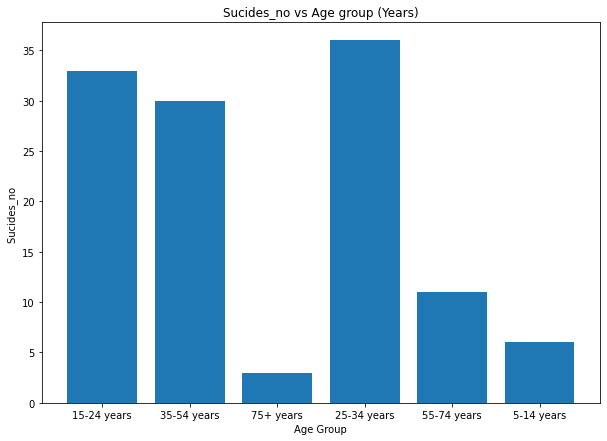

In [ ]:

 

df = pd.DataFrame(data)
 
Age = df['age']
Sucides = df['suicides_no']
 
# Figure Size
fig = plt.figure(figsize =(10, 7))
plt.xlabel("Age Group")
plt.ylabel("Sucides_no ")
plt.title("Sucides_no vs Age group (Years)")

 
# Horizontal Bar Plot
plt.bar(Age[0:100], Sucides[0:100])

 
# Show Plot
plt.show()

From the above graph we can say that  25-34 Age group has more no of suicides cases




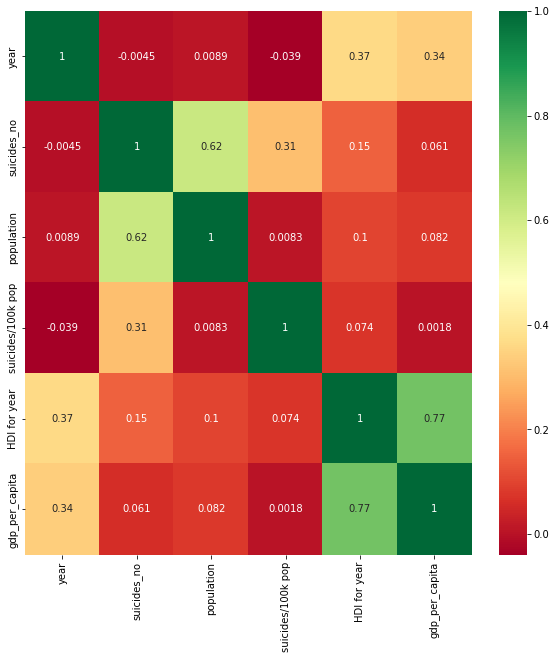

In [ ]:
#heatmap
correrelation=data.corr()
top_corr_features=correrelation.index
plt.figure(figsize=(10,10))

g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

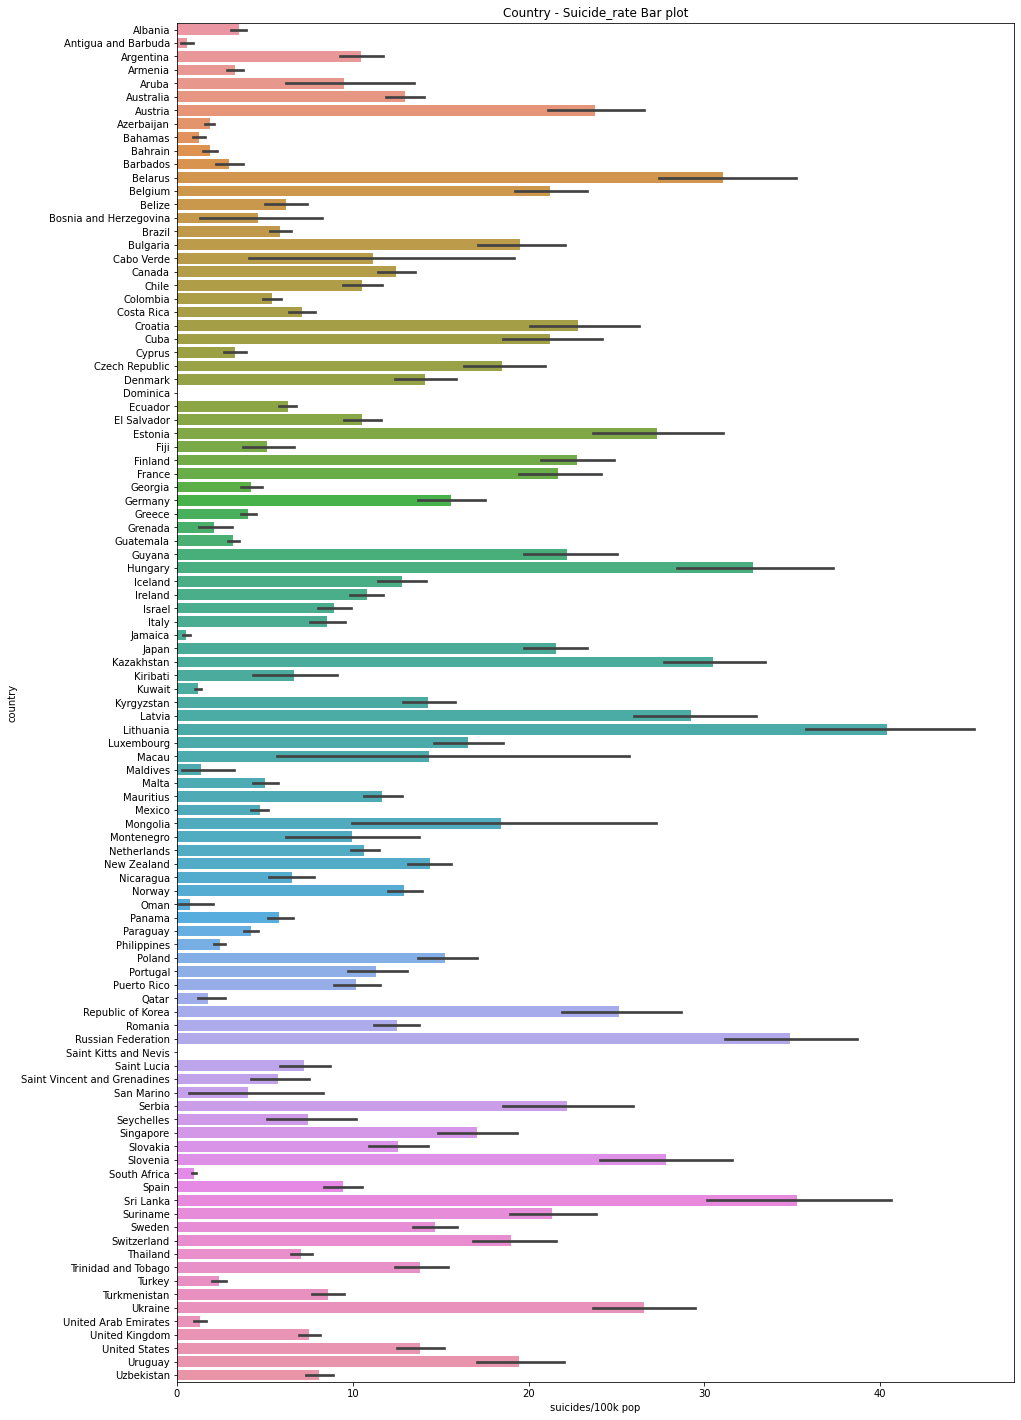

In [ ]:

#Country & Suicide_rate Bar plot

plt.figure(figsize=(15,25))
sns.barplot(x = "suicides/100k pop", y = "country", data = data)
plt.title('Country - Suicide_rate Bar plot')
plt.show()


From the above plot we can say that Lithunia has the highest suicide rate among all the country.

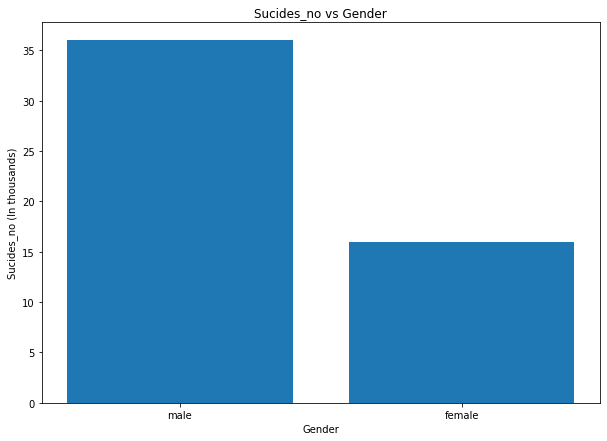

In [ ]:
df = pd.DataFrame(data)
 
Gender= df['sex']
Sucides = df['suicides_no']
 
# Figure Size
fig = plt.figure(figsize =(10, 7))
plt.xlabel("Gender")
plt.ylabel("Sucides_no (In thousands)")
plt.title("Sucides_no vs Gender")

 
# Horizontal Bar Plot
plt.bar(Gender[0:100], Sucides[0:100])
 
# Show Plot
plt.show()

From the above plot we can conclude that male gender rate have more suicide rate than the female.

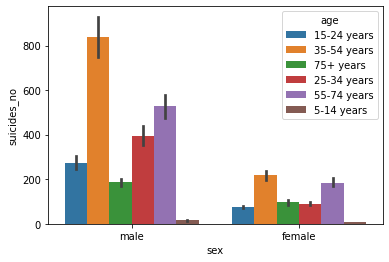

In [ ]:
p=sns.barplot(x='sex',y='suicides_no', hue='age',data=df)

After checking for the all age group we can say that the male gender has the more suicide cases for all age group than the female .

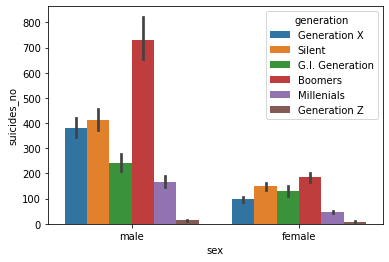

In [ ]:
m=sns.barplot(x='sex',y='suicides_no',hue='generation',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


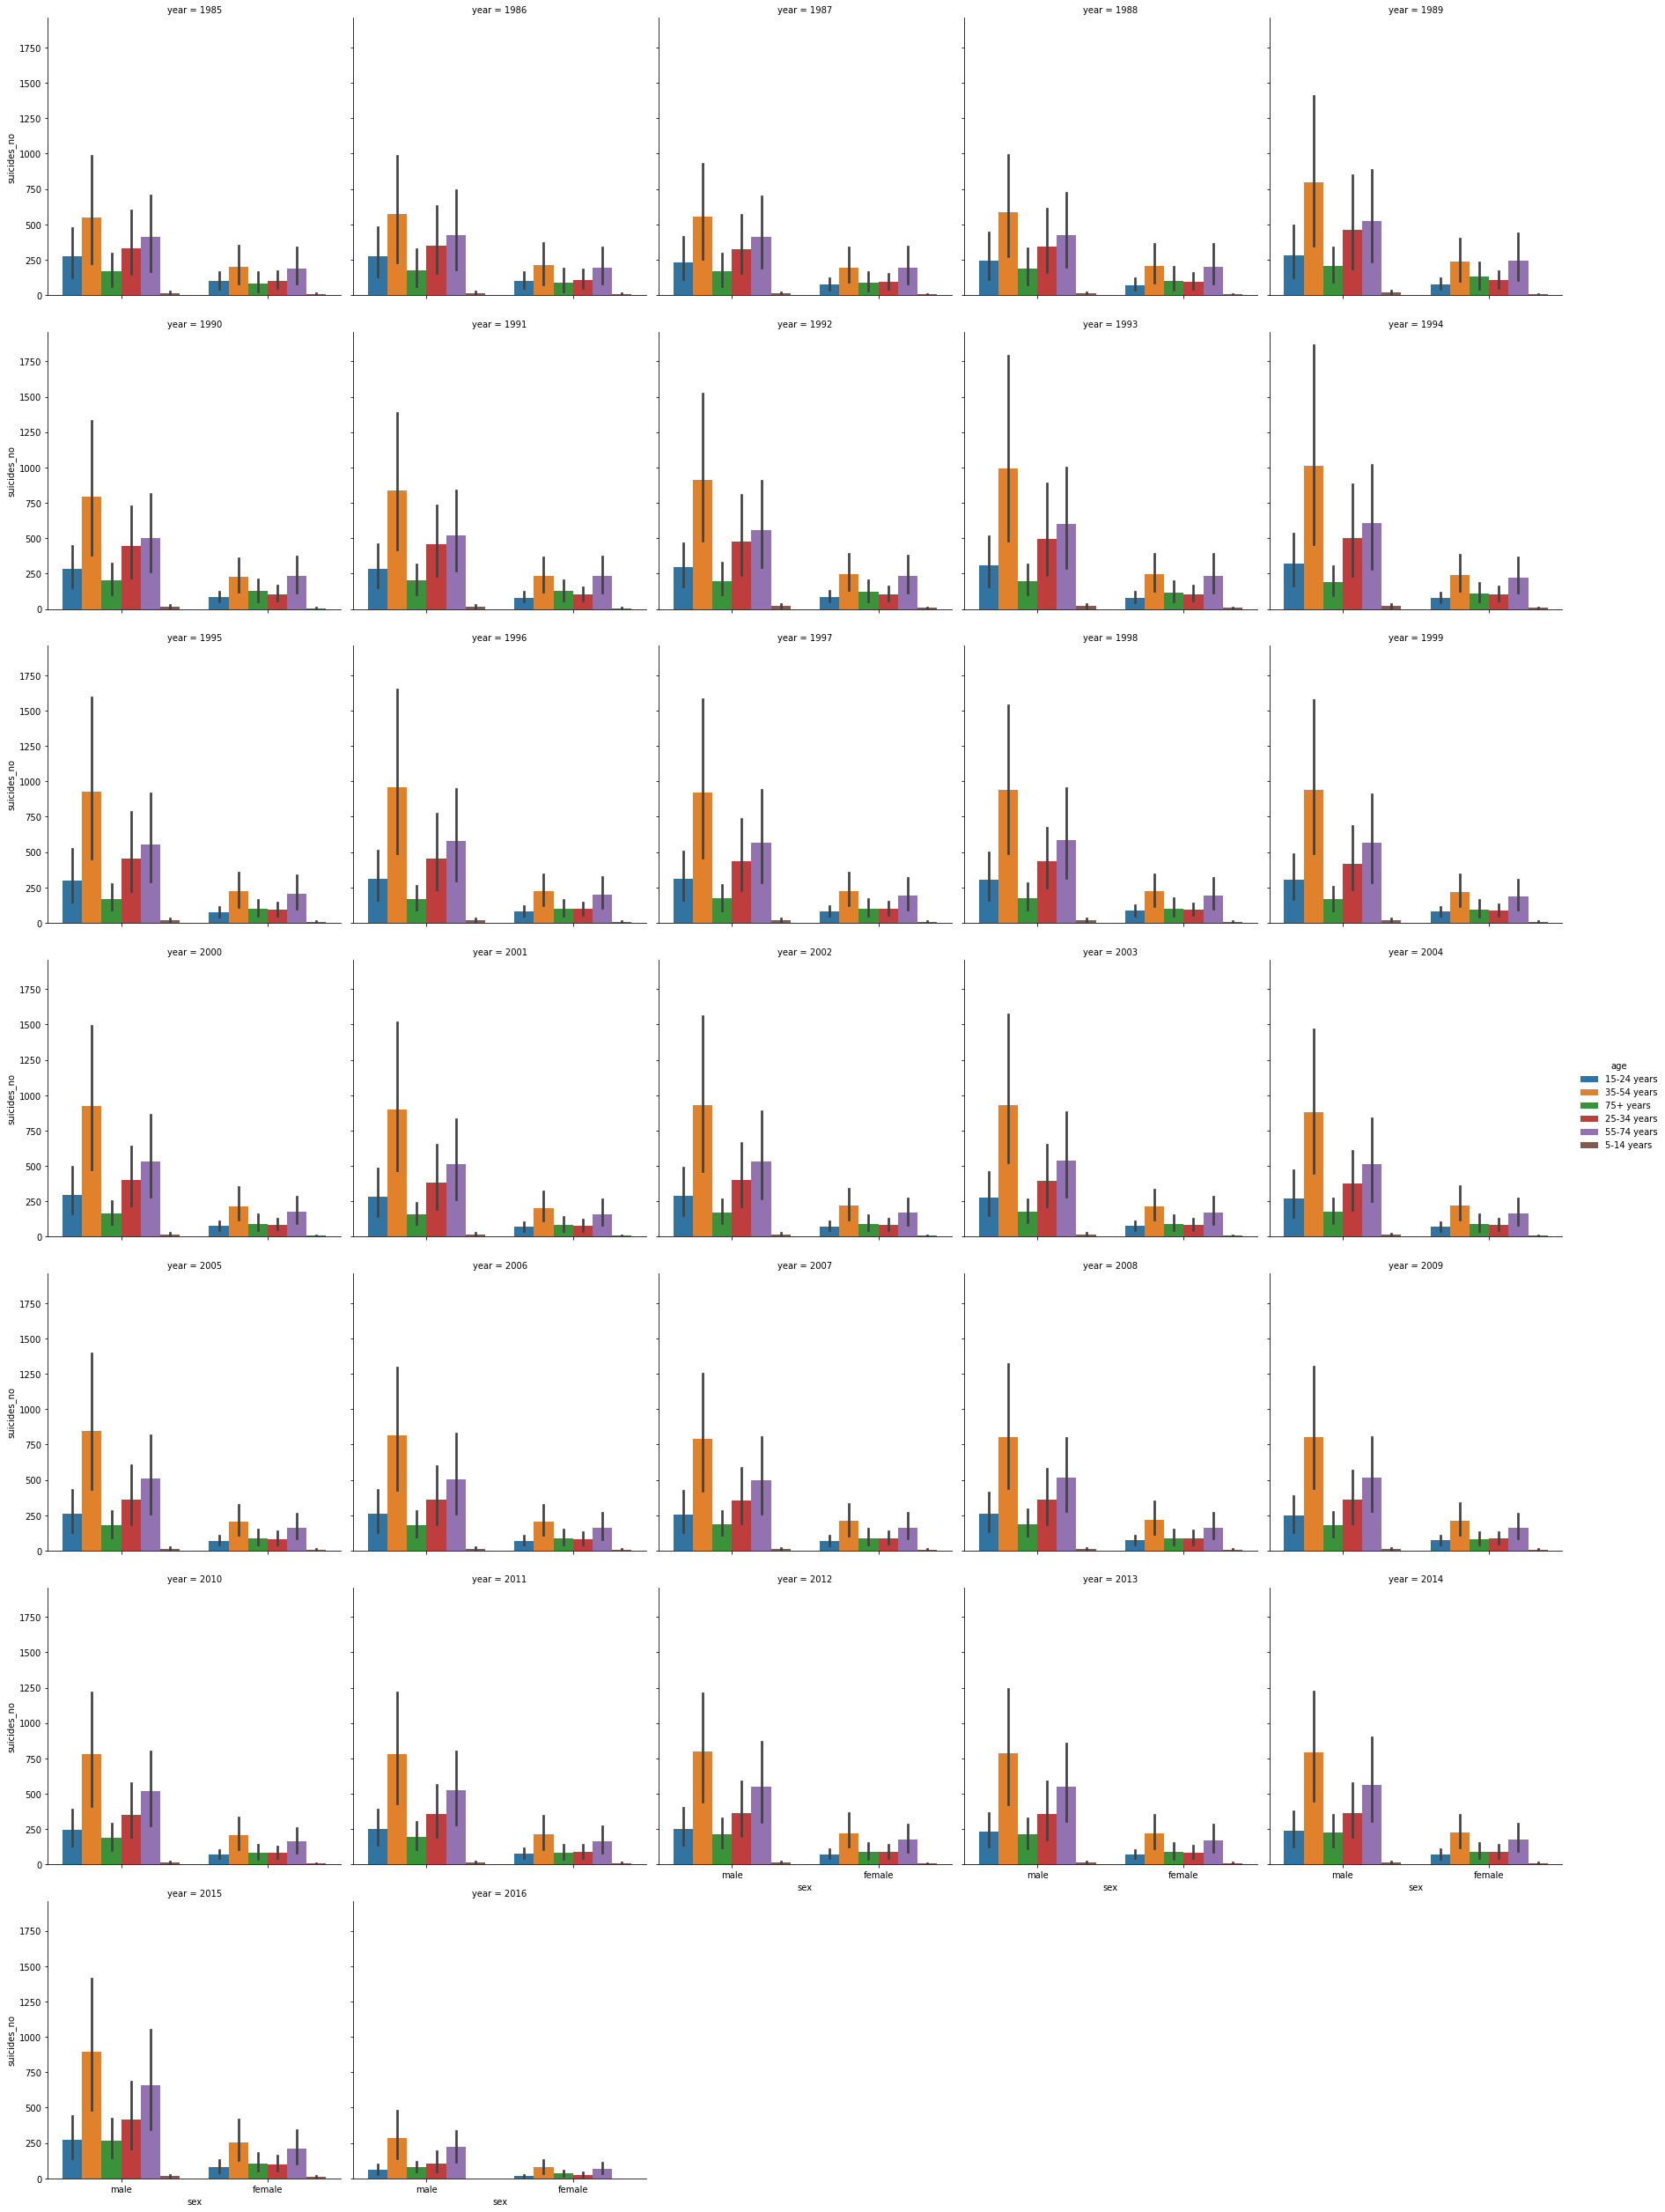

In [ ]:
t=sns.catplot('sex','suicides_no',hue='age',col='year',data=df,kind='bar',col_wrap=5)

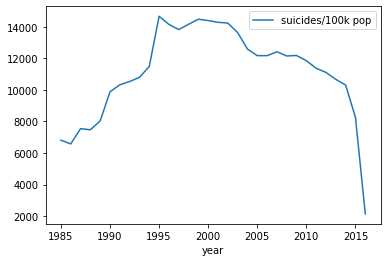

In [ ]:
#Line plpot of year and suicide_rate

data[['year','suicides/100k pop']].groupby(['year']).sum().plot()

suicide cases vs year plot in the period of 1985 to 2016

In [ ]:
pmax=data.population.max()
pmin=data.population.min()
print(pmax)
print(pmin)

43805214
278


<Figure size 1440x720 with 0 Axes>

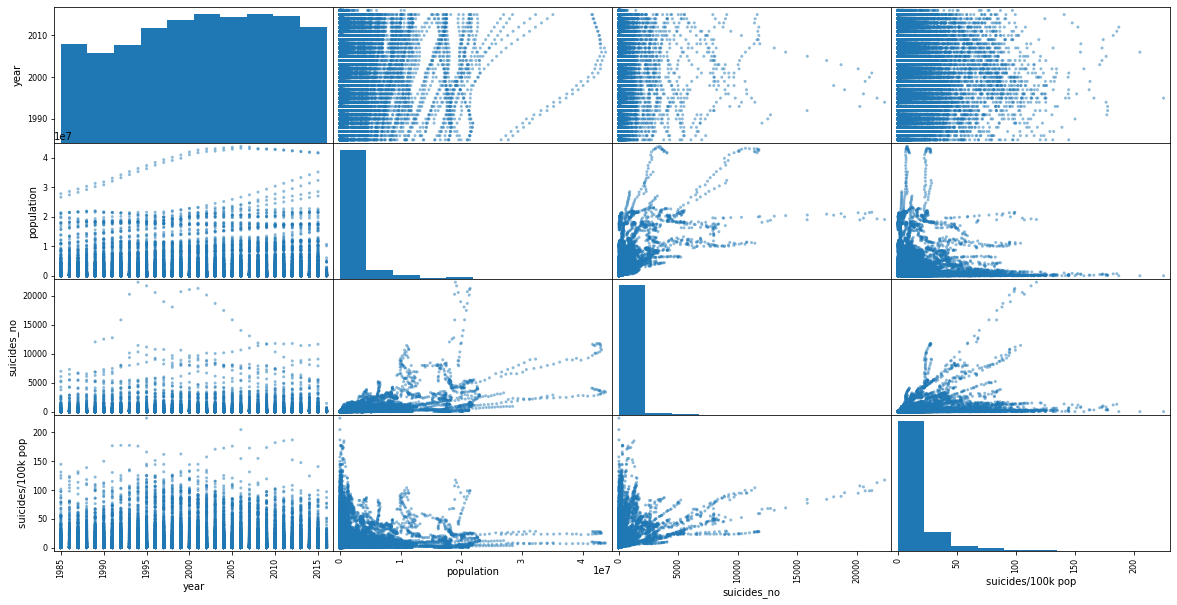

In [ ]:
#Scatter matrix for checking outlier

plt.figure(figsize=(20,10))
attributes = [ 'year','population', 'suicides_no','suicides/100k pop',' gdp_for_year']
scatter_matrix(data[attributes], figsize=(20,10))
plt.show()

In [ ]:
#encoding the categorical features with LabelEncoder

from sklearn.preprocessing import LabelEncoder
categorical = ['country','age', 'sex', 'generation']
le = sklearn.preprocessing.LabelEncoder()

for column in categorical:
    data[column] = le.fit_transform(data[column])

In [ ]:
data

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita,generation
0,0,1987,1,0,21,312900,6.71,"2,156,624,900",796,2
1,0,1987,1,2,16,308000,5.19,"2,156,624,900",796,5
2,0,1987,0,0,14,289700,4.83,"2,156,624,900",796,2
3,0,1987,1,5,1,21800,4.59,"2,156,624,900",796,1
4,0,1987,1,1,9,274300,3.28,"2,156,624,900",796,0
...,...,...,...,...,...,...,...,...,...,...
27815,100,2014,0,2,107,3620833,2.96,"63,067,077,179",2309,2
27816,100,2014,0,5,9,348465,2.58,"63,067,077,179",2309,5
27817,100,2014,1,3,60,2762158,2.17,"63,067,077,179",2309,3
27818,100,2014,0,3,44,2631600,1.67,"63,067,077,179",2309,3


In [ ]:
y=data['suicides_no']
x=data[['country','year','sex','age','population','gdp_per_capita']]

In [ ]:
data

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita,generation
0,0,1987,1,0,21,312900,6.71,"2,156,624,900",796,2
1,0,1987,1,2,16,308000,5.19,"2,156,624,900",796,5
2,0,1987,0,0,14,289700,4.83,"2,156,624,900",796,2
3,0,1987,1,5,1,21800,4.59,"2,156,624,900",796,1
4,0,1987,1,1,9,274300,3.28,"2,156,624,900",796,0
...,...,...,...,...,...,...,...,...,...,...
27815,100,2014,0,2,107,3620833,2.96,"63,067,077,179",2309,2
27816,100,2014,0,5,9,348465,2.58,"63,067,077,179",2309,5
27817,100,2014,1,3,60,2762158,2.17,"63,067,077,179",2309,3
27818,100,2014,0,3,44,2631600,1.67,"63,067,077,179",2309,3


In [ ]:
#splitting the data into train and test sets
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)
x_train.shape,x_test.shape

((22256, 6), (5564, 6))

In [ ]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []
#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))
  


# **Model Building & Training:**

Supervised machine learning is one of the most commonly used and successful types of machine learning. Supervised learning is used whenever we want to predict a certain outcome/label from a given set of features, and we have examples of features-label pairs. We build a machine learning model from these features-label pairs, which comprise our training set. Our goal is to make accurate predictions for new, never-before-seen data.



There are two major types of supervised machine learning problems, called classification and regression. Our data set comes under regression problem, as the prediction of suicide rate is a continuous number, or a floating-point number in programming terms.

# **Linier Regression**

In [ ]:
from sklearn import linear_model
reg=linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
reg.coef_

array([ 7.19284155e-01, -1.25839172e+00,  2.68961491e+02,  2.08746741e+01,
        1.42630051e-04,  5.58313159e-04])

In [ ]:
reg.intercept_

2266.451651905142

In [ ]:
y_test_pred=reg.predict(x_test)
y_test

15184     19
23614    338
21932      1
22386      0
16795    942
        ... 
7474      16
21667      0
24198      0
2876       4
5970       6
Name: suicides_no, Length: 5564, dtype: int64

In [ ]:
y_train_pred=reg.predict(x_train)
y_train_pred

array([-124.74446757, 1477.76898987,  703.02833498, ...,  719.11419693,
        174.85290637,  -87.84723998])

In [ ]:
print("Accuracy of Linier regression model on training data is", reg.score(x_train,y_train)*100,"%")
print("Accuracy of Linier regression model on testing data is", reg.score(x_test,y_test)*100,"%")

Accuracy of Linier regression model on training data is 40.23167608347231 %
Accuracy of Linier regression model on testing data is 41.509641403604704 %


In [ ]:
storeResults('Linier Regression',reg.score(x_train,y_train)*100, reg.score(x_test,y_test)*100)

In [ ]:
reg.predict([[0,2020,1,1,77989,898]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([26.62825466])

Observation-After applying linier regression we can say that accuracy of linier regression is very low for our model also from the graph we realiased that line is not fiiting perfectly.

# **Polynomial Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
x_train=poly.fit_transform(x_train)
x_test=poly.fit_transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
reg.intercept_

5722.893391784105

In [ ]:
reg.coef_

array([ 2.75774643e-03, -1.07003649e+02, -6.60325713e-01, -7.86409127e-02,
       -4.63801846e-01, -6.87411062e-04, -7.12250919e-02, -6.92955972e-02,
        5.68297142e-02,  1.50351711e+00,  3.48041012e-02,  1.01471171e-06,
       -1.18219568e-04, -1.12108765e-03, -6.54465823e-02, -3.26922227e-02,
        3.35666700e-07,  3.95467330e-05, -7.86343676e-02,  1.80702832e+01,
        1.63678009e-04, -9.55036676e-04,  1.21769461e+01,  1.13406428e-05,
        1.93672405e-04,  7.10542736e-13, -9.61520696e-10, -6.48587093e-09])

In [ ]:
y_train_pred1=reg.predict(x_train)
y_train_pred1


array([  46.19509662, 1021.35592316,  593.75983859, ...,  660.20027354,
         21.67575631,   77.98842994])

In [ ]:
y_test_pred1=reg.predict(x_test)
y_test_pred1

array([ 40.45898246, 610.74954396, -81.59793863, ..., -45.29718447,
       -26.54870862,  47.60605167])

In [ ]:
print("Accuracy of polynomial regression model on testing  data",reg.score(x_train,y_train)*100,'%')
print("Accuracy of polynomial regression model on testing  data :",reg.score(x_test,y_test)*100,"%")

Accuracy of polynomial regression model on testing  data 54.97124035397645 %
Accuracy of polynomial regression model on testing  data : 57.870812864758946 %


In [ ]:
storeResults('Polynomial Regression',reg.score(x_train,y_train)*100, reg.score(x_test,y_test)*100)

# #**XGboost** **Regression**

In [ ]:
#XGBoost Regression model
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
# instantiate the model
xgb = XGBRegressor(learning_rate=0.2,max_depth=4) 
#learning_rate=step size shinkage to prevent overfitting
#max_depth=tree ensemble
#fit the model
xgb.fit(x_train, y_train)

[10:30:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.2, max_depth=4)

In [ ]:
ypred3_test=xgb.predict(x_test)
ypred3_test

array([ 28.977032, 388.10236 ,  10.124465, ...,  24.470783,  10.066368,
        20.028124], dtype=float32)

In [ ]:
ypred3_train=xgb.predict(x_train)
ypred3_train

array([  14.121252,   68.30998 ,  593.439   , ..., 1127.1189  ,
         -9.668497,   27.892017], dtype=float32)

In [ ]:
print("Accuracy of XGBoost Regression on training data",xgb.score(x_train,y_train)*100,'%')
print("Accuracy of XGBoost Regression on testing data", xgb.score(x_test,y_test)*100,'%')


Accuracy of XGBoost Regression on training data 98.87683715681828 %
Accuracy of XGBoost Regression on testing data 97.00039187515623 %


In [ ]:
storeResults('XGBoost Regression',xgb.score(x_train,y_train)*100, xgb.score(x_test,y_test)*100)

# **Comparision of** **Model**

In [ ]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test
    })
results

,ML Model,Train Accuracy,Test Accuracy
0,Linier Regression,40.232,41.510
1,Polynomial Regression,54.971,57.871
2,XGBoost Regression,98.877,97.000


In [ ]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
2,XGBoost Regression,98.877,97.000
1,Polynomial Regression,54.971,57.871
0,Linier Regression,40.232,41.510


# **Result**

After applying regression algorithm to model we can clearly observe that XGBoost Regression algorithm is best model for our data set beacause it gives highest accuracy among other model.

# **Conclusion**

The final take away form this project is the working of different machine learning models on a dataset and understanding their parameters. 
The final conclusion on the suicide dataset are that the irrespective of age group and generation, male population are more prone to commit suicide than female. 